### Importación de datos



In [13]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [9]:
# Almacenar información de la columna "Precio" de las tiendas
ingresos_tiendas = {
    'Tienda 1': tienda['Precio'].sum(),
    'Tienda 2': tienda2['Precio'].sum(),
    'Tienda 3': tienda3['Precio'].sum(),
    'Tienda 4': tienda4['Precio'].sum()
}

# Calcular los ingresos totales
def ingreso_total_tiendas():
    return sum(ingresos_tiendas.values())

In [10]:
# Crear DataFrame con los ingresos
tabla_ingresos = pd.DataFrame({
    "Tienda": list(ingresos_tiendas.keys()),
    "Ingresos": list(ingresos_tiendas.values())
})

tabla_ingresos

,Tienda,Ingresos
0,Tienda 1,1.150880e+09
1,Tienda 2,1.116344e+09
2,Tienda 3,1.098020e+09
3,Tienda 4,1.038376e+09


##Graficación

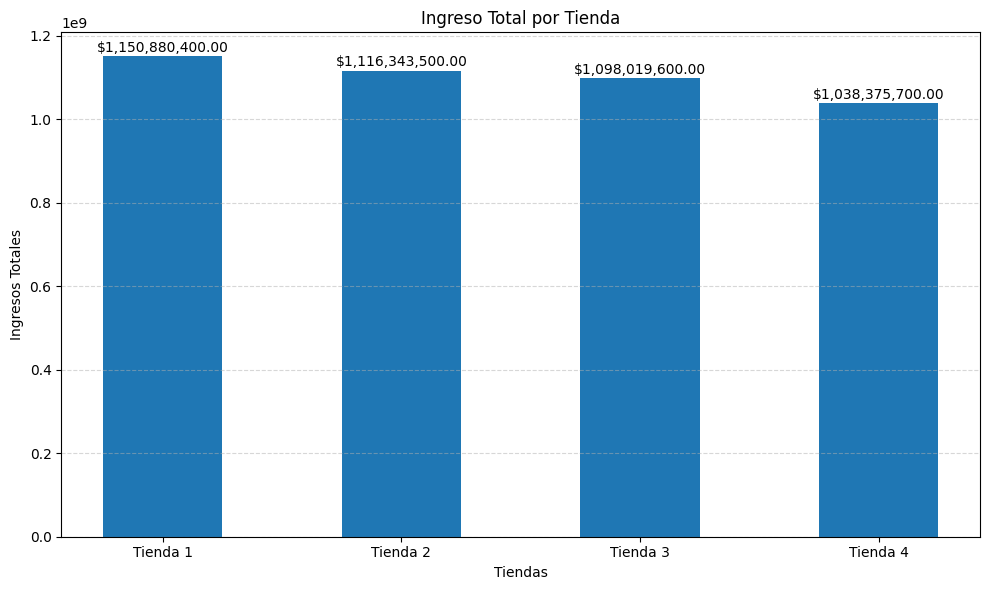

In [16]:
# Crear gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(tabla_ingresos["Tienda"], tabla_ingresos["Ingresos"], width=0.5)

# Etiquetas y título
plt.xlabel("Tiendas")
plt.ylabel("Ingresos Totales")
plt.title("Ingreso Total por Tienda")

# Mostrar valor exacto sobre cada barra
for i, valor in enumerate(tabla_ingresos["Ingresos"]):
    plt.text(i, valor + valor * 0.01, f"${valor:,.2f}", ha='center', fontsize=10)

# Ajustes finales
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

     Tienda  Porcentaje (%)
0  Tienda 1       26.134876
1  Tienda 2       25.350591
2  Tienda 3       24.934481
3  Tienda 4       23.580052


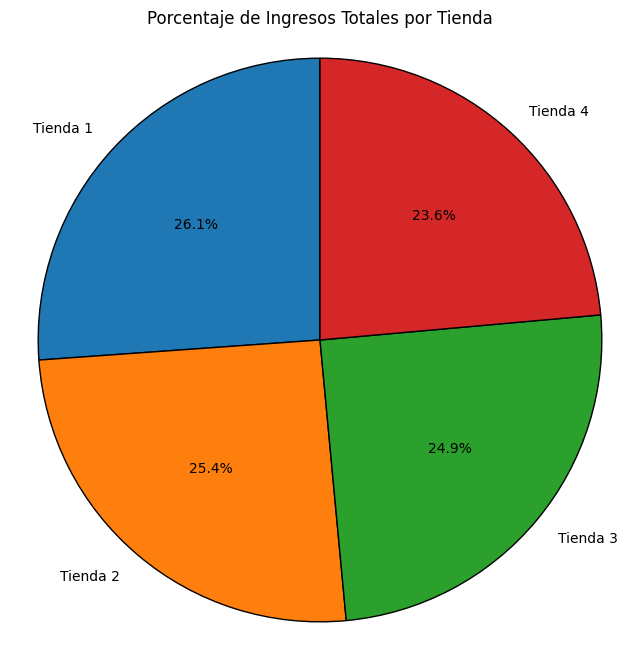

In [17]:
import matplotlib.pyplot as plt

# Reutilizar el diccionario de ingresos
ingresos_tiendas = {
    'Tienda 1': tienda['Precio'].sum(),
    'Tienda 2': tienda2['Precio'].sum(),
    'Tienda 3': tienda3['Precio'].sum(),
    'Tienda 4': tienda4['Precio'].sum()
}

# Crear DataFrame con porcentajes
total_ingresos = sum(ingresos_tiendas.values())
porcentaje_ingresos = {tienda: (ingreso / total_ingresos) * 100 for tienda, ingreso in ingresos_tiendas.items()}

tabla_porcentajes = pd.DataFrame({
    "Tienda": list(porcentaje_ingresos.keys()),
    "Porcentaje (%)": list(porcentaje_ingresos.values())
})

# Mostrar tabla (opcional en notebooks)
print(tabla_porcentajes)

# Crear gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(
    tabla_porcentajes["Porcentaje (%)"],
    labels=tabla_porcentajes["Tienda"],
    autopct="%1.1f%%",
    startangle=90,
    wedgeprops={"edgecolor": "black"}
)

plt.title("Porcentaje de Ingresos Totales por Tienda")
plt.axis("equal")
plt.show()


# 2. Ventas por categoría

In [22]:
# Calcular ventas por categoría para cada tienda
ventas_categoria = {
    'tienda': tienda[['Categoría del Producto','Precio']],
    'tienda2': tienda2[['Categoría del Producto','Precio']],
    'tienda3': tienda3[['Categoría del Producto','Precio']],
    'tienda4': tienda4[['Categoría del Producto','Precio']]
}

# Mostrar resultados ordenados
for nombre_tienda, categorias in ventas_categoria.items():
    print(f"\nVentas por categoría en {nombre_tienda}")
    print(categorias)



Ventas por categoría en tienda
     Categoría del Producto     Precio
0              Electrónicos   164300.0
1                   Muebles   192300.0
2                  Juguetes   209600.0
3         Electrodomésticos   757500.0
4                   Muebles   335200.0
...                     ...        ...
2354           Electrónicos  1284400.0
2355           Electrónicos   282800.0
2356               Juguetes   122900.0
2357                Muebles   691300.0
2358           Electrónicos   195000.0

[2359 rows x 2 columns]

Ventas por categoría en tienda2
       Categoría del Producto     Precio
0                     Muebles   283600.0
1      Instrumentos musicales    76800.0
2                     Muebles   443300.0
3                     Muebles   906200.0
4                     Muebles   397800.0
...                       ...        ...
2354  Artículos para el hogar   140300.0
2355        Electrodomésticos  1220100.0
2356        Electrodomésticos   797900.0
2357             Electrónicos  2

In [24]:
# Crear diccionario para almacenar las ventas por categoría
categoria_tienda = {}

# Recorrer cada tienda y calcular conteo de productos por categoría
ventas_categoria = {
    'Tienda 1': tienda,
    'Tienda 2': tienda2,
    'Tienda 3': tienda3,
    'Tienda 4': tienda4
}

for nombre_tienda, datos in ventas_categoria.items():
    conteo = datos['Categoría del Producto'].value_counts()
    categoria_tienda[nombre_tienda] = conteo

# Combinar los resultados en un solo DataFrame (llenando NaN con 0)
df_categorias = pd.DataFrame(categoria_tienda).fillna(0).astype(int)


##Graficación

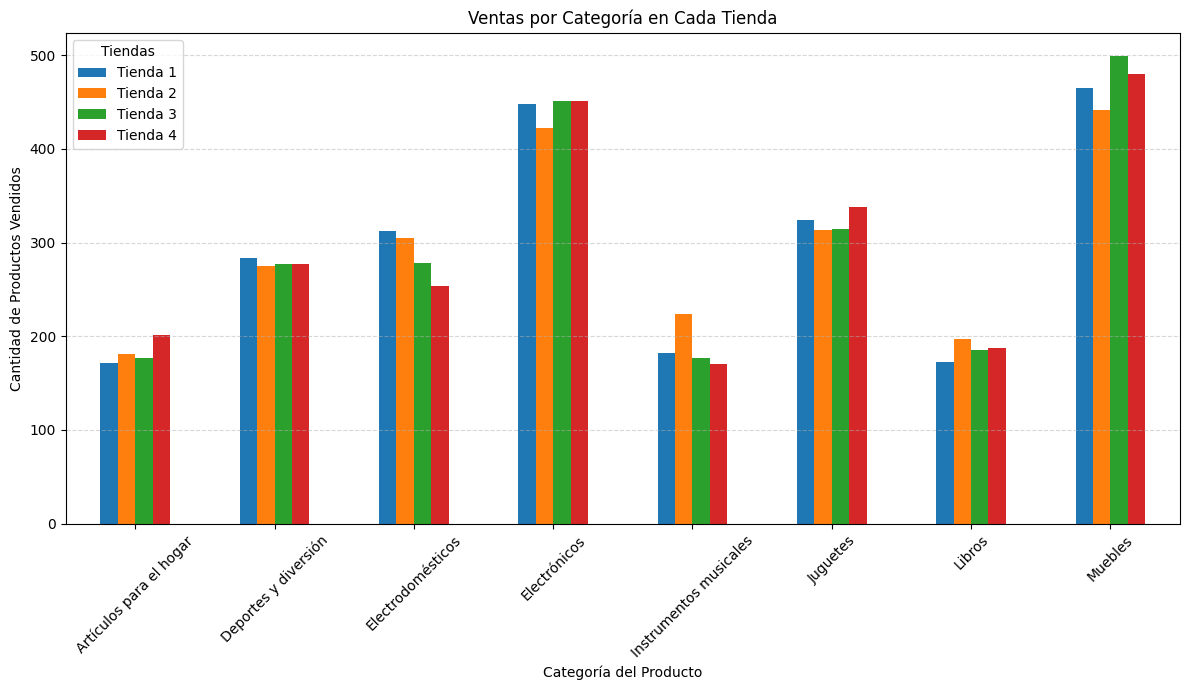

In [29]:
# Configuración del gráfico
df_categorias.plot(kind='bar', figsize=(12, 7))

plt.title("Ventas por Categoría en Cada Tienda")
plt.xlabel("Categoría del Producto")
plt.ylabel("Cantidad de Productos Vendidos")
plt.xticks(rotation=45)
plt.legend(title="Tiendas")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# 3. Calificación promedio de la tienda


In [27]:
# Calificación promedio por tienda
calificacion_tiendas = {
    'Tienda 1': tienda['Calificación'].mean(),
    'Tienda 2': tienda2['Calificación'].mean(),
    'Tienda 3': tienda3['Calificación'].mean(),
    'Tienda 4': tienda4['Calificación'].mean()
}

# Convertir a DataFrame y ordenar
ranking_calificacion = pd.DataFrame.from_dict(
    calificacion_tiendas, orient='index', columns=['Calificación Promedio']
).sort_values(by='Calificación Promedio', ascending=False)

ranking_calificacion.reset_index(inplace=True)
ranking_calificacion.rename(columns={'index': 'Tienda'}, inplace=True)


In [45]:
# Redondear calificaciones a 2 decimales
ranking_calificacion['Calificación Promedio'] = ranking_calificacion['Calificación Promedio'].round(2)

# Cambiar el índice para que comience en 1 en lugar de 0
ranking_calificacion.index = range(1, len(ranking_calificacion) + 1)

# Mostrar tabla
print("📋 Calificación promedio por tienda (ordenada):")
display(ranking_calificacion)


📋 Calificación promedio por tienda (ordenada):


,Tienda,Calificación Promedio
1,Tienda 3,4.05
2,Tienda 2,4.04
3,Tienda 4,4.00
4,Tienda 1,3.98


# 4. Productos más y menos vendidos

# 5. Envío promedio por tienda